In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import joblib

%matplotlib inline
sns.set(style="whitegrid")

print("Libraries loaded. Ready to run the project.")


Libraries loaded. Ready to run the project.


In [3]:
df = sns.load_dataset('titanic')
print("Shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())


Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [4]:

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone']
df = df[features + ['survived']]
print("Missing values by column:")
print(df.isnull().sum())
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

print("\nAfter filling missing values:")
print(df.isnull().sum())
display(df.head())


Missing values by column:
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
survived      0
dtype: int64

After filling missing values:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
survived    0
dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked,alone,survived
0,3,male,22.0,1,0,7.2500,S,False,0
1,1,female,38.0,1,0,71.2833,C,False,1
2,3,female,26.0,0,0,7.9250,S,True,1
3,1,female,35.0,1,0,53.1000,S,False,1
4,3,male,35.0,0,0,8.0500,S,True,0


Survival rate (overall): 0.3838383838383838

Survival rate by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


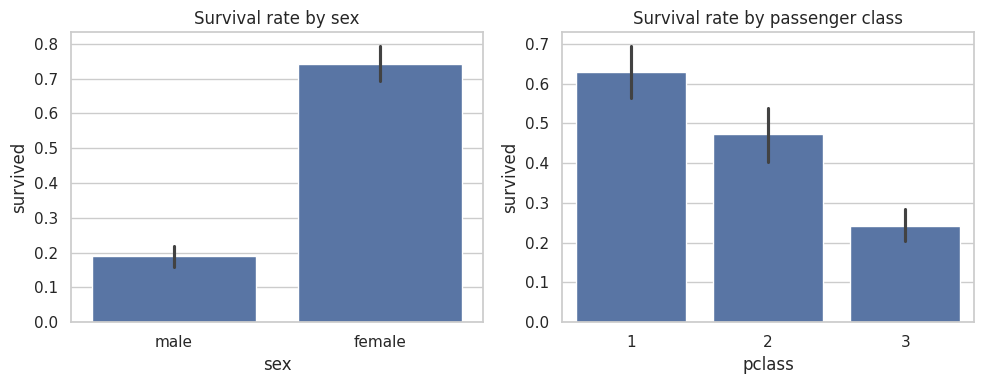

In [5]:
print("Survival rate (overall):", df['survived'].mean())
print("\nSurvival rate by sex:")
print(df.groupby('sex')['survived'].mean())
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival rate by sex')
plt.subplot(1,2,2)
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival rate by passenger class')
plt.tight_layout()
plt.show()


In [6]:
X = df.drop(columns='survived')
y = df['survived']
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)
print("Features after encoding:", X.columns.tolist())
print("X shape:", X.shape, "y shape:", y.shape)
display(X.head())


Features after encoding: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']
X shape: (891, 9) y shape: (891,)


,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False
2,3,26.0,0,0,7.9250,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,True
4,3,35.0,0,0,8.0500,True,True,False,True


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (712, 9) Test shape: (179, 9)


In [8]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, random_state=42))
])
pipe_lr.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Models trained.")


Models trained.



=== Logistic Regression ===
Accuracy: 0.8045
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



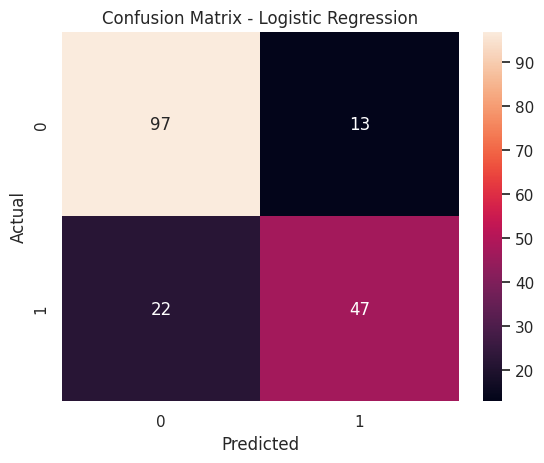

ROC AUC: 0.8499


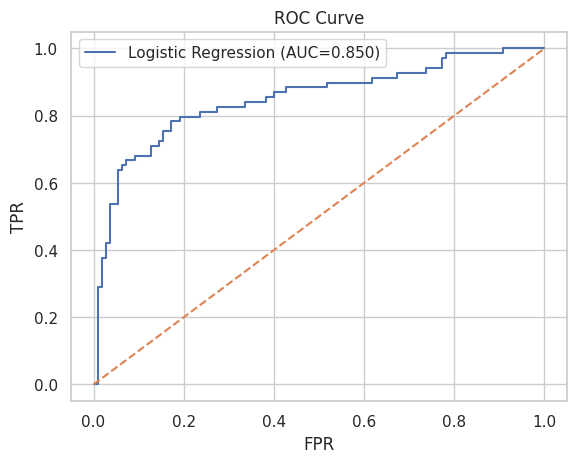


=== Random Forest ===
Accuracy: 0.8156
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



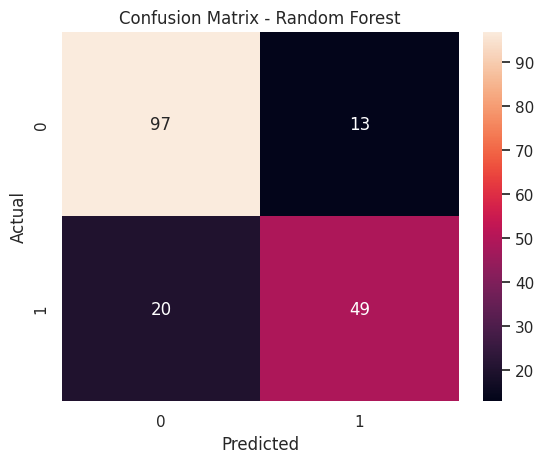

ROC AUC: 0.8343


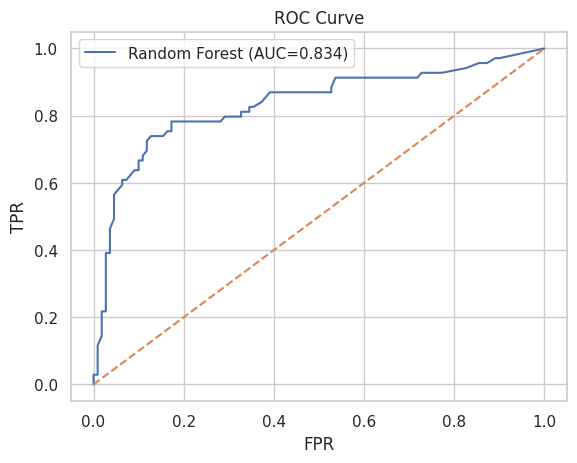

In [9]:
def evaluate_model(model, X_t, y_t, name="Model"):
    y_pred = model.predict(X_t)
    acc = accuracy_score(y_t, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Classification report:")
    print(classification_report(y_t, y_pred))
    cm = confusion_matrix(y_t, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_t)[:,1]
        auc = roc_auc_score(y_t, y_proba)
        print("ROC AUC:", round(auc, 4))
        fpr, tpr, _ = roc_curve(y_t, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
        plt.plot([0,1], [0,1], linestyle='--')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.legend()
        plt.show()
evaluate_model(pipe_lr, X_test, y_test, name="Logistic Regression")
evaluate_model(rf, X_test, y_test, name="Random Forest")


In [10]:

best_model = rf
joblib.dump(best_model, "/content/titanic_random_forest.pkl")
print("Saved model to /content/titanic_random_forest.pkl")


Saved model to /content/titanic_random_forest.pkl


In [11]:
sample = X_test.sample(5, random_state=1)
display(sample)
preds = best_model.predict(sample)
probs = best_model.predict_proba(sample)[:,1]
results = sample.copy()
results['predicted_survived'] = preds
results['survival_probability'] = probs
display(results)


,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
571,1,53.0,2,0,51.4792,False,False,False,True
92,1,46.0,1,0,61.1750,False,True,False,True
459,3,28.0,0,0,7.7500,True,True,True,False
484,1,25.0,1,0,91.0792,False,True,False,False
869,3,4.0,1,1,11.1333,False,True,False,True


,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,predicted_survived,survival_probability
571,1,53.0,2,0,51.4792,False,False,False,True,1,0.940000
92,1,46.0,1,0,61.1750,False,True,False,True,1,0.570000
459,3,28.0,0,0,7.7500,True,True,True,False,0,0.311976
484,1,25.0,1,0,91.0792,False,True,False,False,0,0.500000
869,3,4.0,1,1,11.1333,False,True,False,True,1,0.805000
